In [1]:
import clean as c
import numpy as numpy
import pandas as pd


from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text( 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = c.df_b
features = c.features + c.encode_n

In [3]:
features

['Symptom Severity (1-10)',
 'Sleep Quality (1-10)',
 'Mood Score (1-10)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)',
 'Med_n',
 'Therapy_n',
 'Emot_n',
 'Diag_n']

## For the Binary Outcome of no change & Improved

In [4]:
df = c.df1

In [5]:
clf = DecisionTreeClassifier(max_depth=None, random_state = 0)

X = df[features]
y = df['Outcome']
clf = clf.fit(X, y)

accuracy = clf.score(X, y)
print(f'accuracy={accuracy}')
tree_depth = clf.tree_.max_depth
print(f'tree_depth= {tree_depth}')

accuracy=0.9787234042553191
tree_depth= 14


In [6]:
# If training accuracy is much higher than the testing accuray, the model is overfitting

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)

# Evaluate accuracy on training and testing sets
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9885931558935361
Testing Accuracy: 0.5454545454545454


In [8]:
"""
Decision tree is overfitting
limit max depth
"""
for depth in range(1, 15):
    clf_pruned = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf_pruned.fit(X_train, y_train)
    train_acc = clf_pruned.score(X_train, y_train)
    test_acc = clf_pruned.score(X_test, y_test)
    print(f"Depth: {depth}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")



Depth: 1, Train Accuracy: 0.551, Test Accuracy: 0.530
Depth: 2, Train Accuracy: 0.567, Test Accuracy: 0.515
Depth: 3, Train Accuracy: 0.624, Test Accuracy: 0.485
Depth: 4, Train Accuracy: 0.681, Test Accuracy: 0.530
Depth: 5, Train Accuracy: 0.726, Test Accuracy: 0.515
Depth: 6, Train Accuracy: 0.772, Test Accuracy: 0.545
Depth: 7, Train Accuracy: 0.837, Test Accuracy: 0.500
Depth: 8, Train Accuracy: 0.878, Test Accuracy: 0.515
Depth: 9, Train Accuracy: 0.928, Test Accuracy: 0.576
Depth: 10, Train Accuracy: 0.951, Test Accuracy: 0.576
Depth: 11, Train Accuracy: 0.970, Test Accuracy: 0.591
Depth: 12, Train Accuracy: 0.973, Test Accuracy: 0.530
Depth: 13, Train Accuracy: 0.985, Test Accuracy: 0.545
Depth: 14, Train Accuracy: 0.985, Test Accuracy: 0.545


As the decision tree depth increased, the training accuracy increased, but the testing accruacy decreased for 80% training and 20% testing on the data. This proves to show that overfitting is happening. 

In [9]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
8                     Diag_n    0.213987
5                      Med_n    0.202743
7                     Emot_n    0.146881
6                  Therapy_n    0.109594
3        Stress Level (1-10)    0.082618
1       Sleep Quality (1-10)    0.072266
2          Mood Score (1-10)    0.071372
0    Symptom Severity (1-10)    0.058355
4  Treatment Progress (1-10)    0.042183


For testing Decision Tree as a classifier, features that were deemed to be more important were:

Diagnosis, Medication, Emotional State, and Therapy Type. These were categorical values that were encoded with LabelEncoder. 

Accuracy: 0.556
Tree Depth: 2


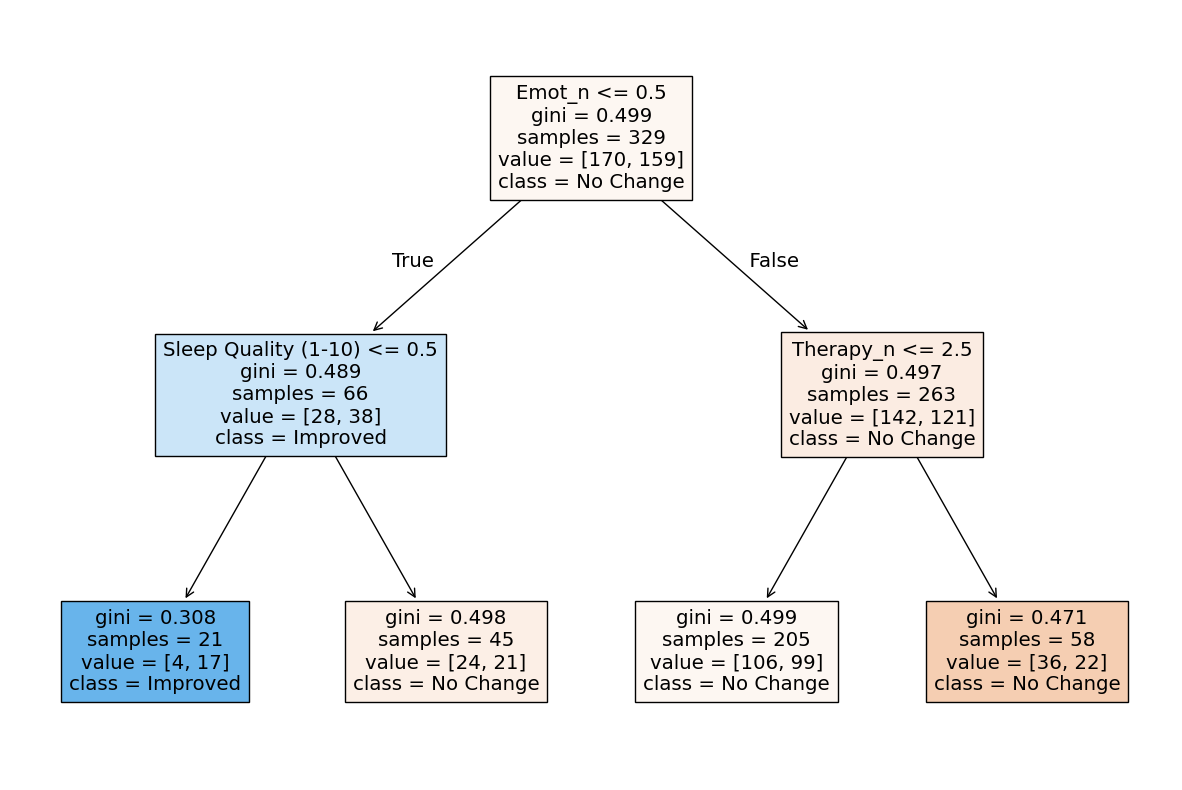

In [10]:
clf2 = DecisionTreeClassifier(max_depth=2, random_state=0)
clf2 = clf2.fit(X,y)

# Report its accuracy (with 3 decimal places). 
accuracy2 = clf2.score(X,y)
print(f'Accuracy: {accuracy2:.3f}\nTree Depth: {clf2.tree_.max_depth}')

plt.figure(figsize=(15, 10))
# Use tree.plot_tree() to display it, including feature_names to make the tree easy to read.
tree.plot_tree(clf2, feature_names=features, class_names=['No Change', 'Improved'], filled=True)
plt.show()

## For the binary outcome of no change & Deter

In [11]:
df = c.df2 # no change & deter


clf = DecisionTreeClassifier(max_depth=None, random_state = 0)

X = df[features]
y = df['Outcome']
clf = clf.fit(X, y)

accuracy = clf.score(X, y)
print(f'accuracy={accuracy}')
tree_depth = clf.tree_.max_depth
print(f'tree_depth= {tree_depth}')

accuracy=0.996969696969697
tree_depth= 15


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)

# Evaluate accuracy on training and testing sets
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Testing Accuracy: 0.5909090909090909


In [13]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
7                     Emot_n    0.272596
6                  Therapy_n    0.190451
8                     Diag_n    0.176564
5                      Med_n    0.164052
4  Treatment Progress (1-10)    0.048714
3        Stress Level (1-10)    0.040984
1       Sleep Quality (1-10)    0.038826
0    Symptom Severity (1-10)    0.036776
2          Mood Score (1-10)    0.031037


Accuracy: 0.591
Tree Depth: 2


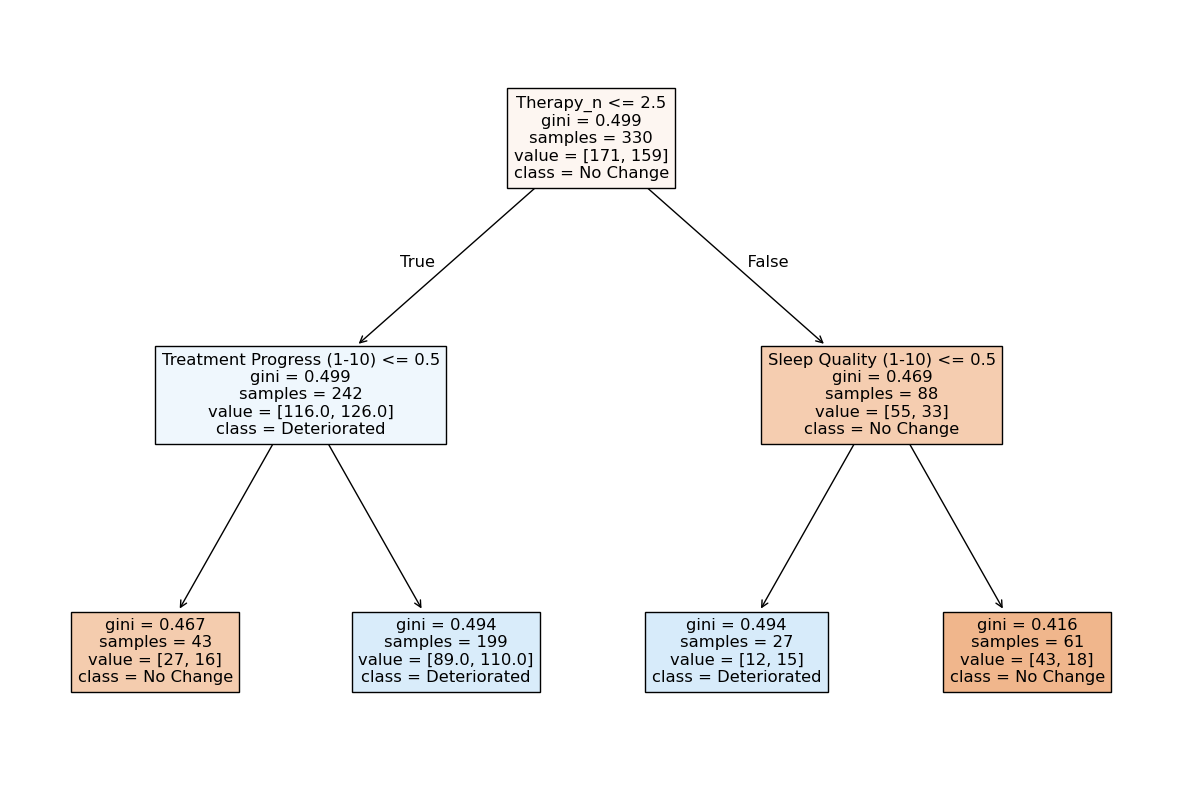

In [14]:
clf2 = DecisionTreeClassifier(max_depth=2, random_state=0)
clf2 = clf2.fit(X,y)

# Report its accuracy (with 3 decimal places). 
accuracy2 = clf2.score(X,y)
print(f'Accuracy: {accuracy2:.3f}\nTree Depth: {clf2.tree_.max_depth}')

plt.figure(figsize=(15, 10))
# Use tree.plot_tree() to display it, including feature_names to make the tree easy to read.
tree.plot_tree(clf2, feature_names=features, class_names=['No Change', 'Deteriorated'], filled=True)

plt.show()

In [15]:
for depth in range(1, 16):
    clf_pruned = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf_pruned.fit(X_train, y_train)
    train_acc = clf_pruned.score(X_train, y_train)
    test_acc = clf_pruned.score(X_test, y_test)
    print(f"Depth: {depth}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")



Depth: 1, Train Accuracy: 0.545, Test Accuracy: 0.409
Depth: 2, Train Accuracy: 0.576, Test Accuracy: 0.455
Depth: 3, Train Accuracy: 0.610, Test Accuracy: 0.455
Depth: 4, Train Accuracy: 0.655, Test Accuracy: 0.500
Depth: 5, Train Accuracy: 0.716, Test Accuracy: 0.545
Depth: 6, Train Accuracy: 0.761, Test Accuracy: 0.455
Depth: 7, Train Accuracy: 0.826, Test Accuracy: 0.545
Depth: 8, Train Accuracy: 0.875, Test Accuracy: 0.591
Depth: 9, Train Accuracy: 0.905, Test Accuracy: 0.591
Depth: 10, Train Accuracy: 0.947, Test Accuracy: 0.621
Depth: 11, Train Accuracy: 0.970, Test Accuracy: 0.591
Depth: 12, Train Accuracy: 0.989, Test Accuracy: 0.561
Depth: 13, Train Accuracy: 1.000, Test Accuracy: 0.591
Depth: 14, Train Accuracy: 1.000, Test Accuracy: 0.591
Depth: 15, Train Accuracy: 1.000, Test Accuracy: 0.591


Higher depths, may risk overfitting the training accuracy. 

Depth 8 or Depth 10 both have good balances of training and testing accuracy. 
Depth 10 ahcieves the highest testing accuracy (62.1%), but needs to be confirmed with cross-validation.

In [16]:
# Train with chosen depth 10
clf_final = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_final.fit(X_train, y_train)

train_accuracy = clf_final.score(X_train, y_train)
test_accuracy = clf_final.score(X_test, y_test)

print(f"Final Tree Training Accuracy: {train_accuracy:.3f}")
print(f"Final Tree Testing Accuracy: {test_accuracy:.3f}")


Final Tree Training Accuracy: 0.947
Final Tree Testing Accuracy: 0.621


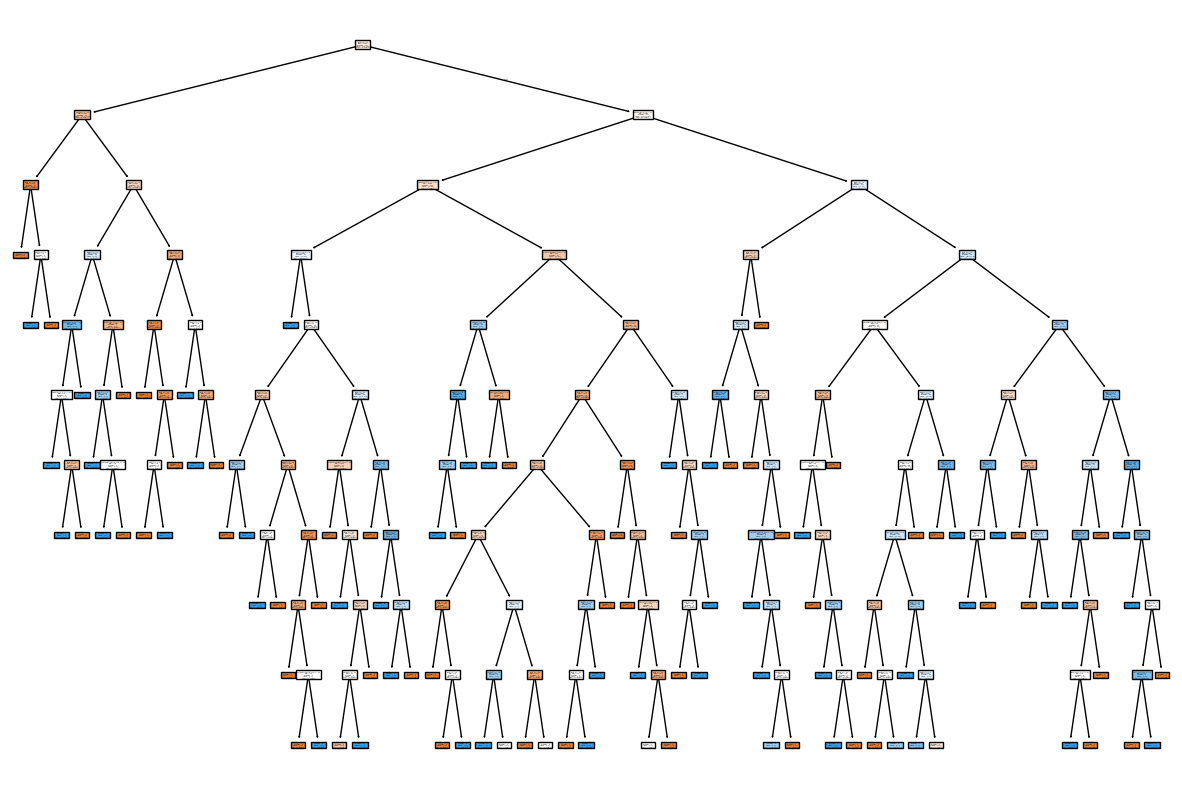

In [17]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_final, feature_names=features, class_names=['No Change','Deteriorated'], filled=True)
plt.show()

In [18]:
# cross-validation

cv_scores = cross_val_score(clf_final, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Cross-Validation Accuracy: 0.555 ± 0.053


The cross validation accuracy indicates that the performance is consistent. 

Average accruacy 55.5%, means that the decision tree is only slightly better than random guessing for binary classification. 

The standard deviation(+- 5.3%), means that the variability across this data subset is moderate. The model's performance is relatively consistent.

Final Tree Training Accuracy: 0.576
Final Tree Testing Accuracy: 0.455


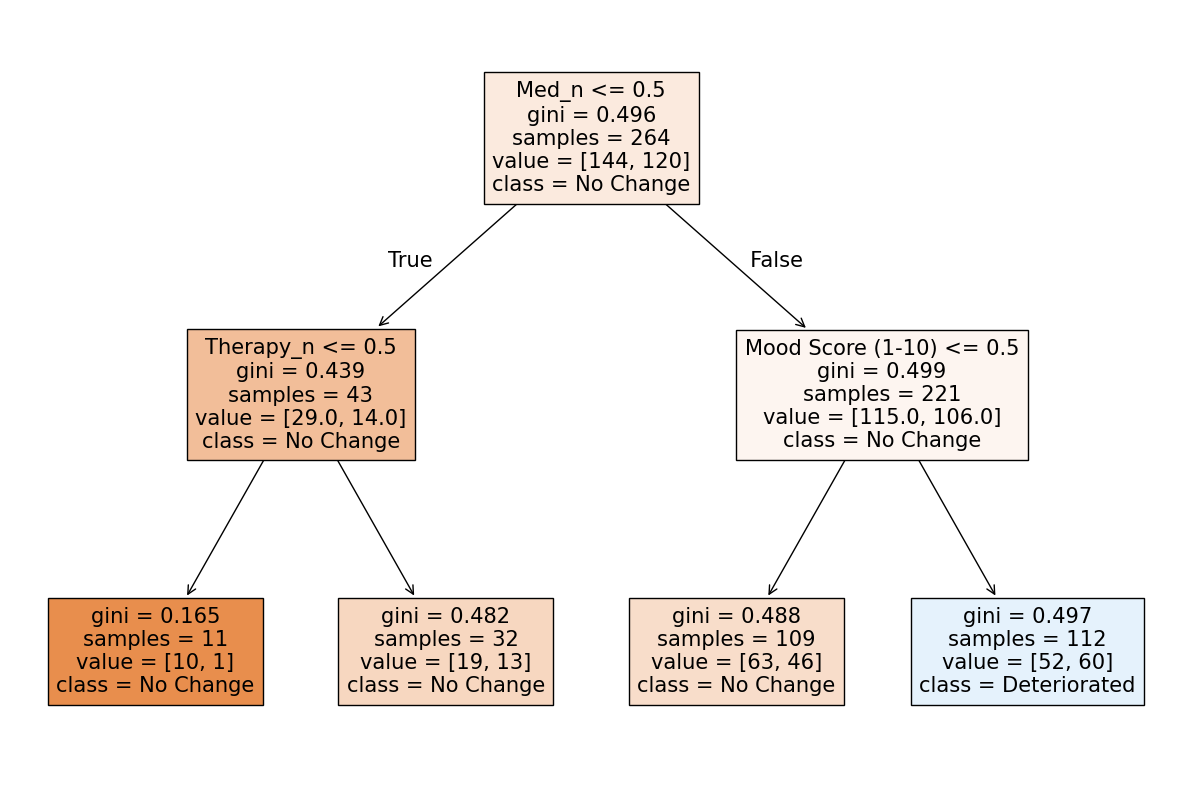

In [19]:
# For easier visuals - max-depth = 2
clf_final = DecisionTreeClassifier(max_depth=2, random_state=0)
clf_final.fit(X_train, y_train)

train_accuracy = clf_final.score(X_train, y_train)
test_accuracy = clf_final.score(X_test, y_test)

print(f"Final Tree Training Accuracy: {train_accuracy:.3f}")
print(f"Final Tree Testing Accuracy: {test_accuracy:.3f}")

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_final, feature_names=features, class_names=['No Change','Deteriorated'], filled=True)
plt.show()